# X-Ray Emission Spectra
**by <span style="color:darkgreen">Christian Vorwerk</span> for [<span style="color:DarkGoldenRod">exciting *oxygen*</span>](http://exciting.wikidot.com/oxygen)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Megha Arya</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, we will show how to perform **X-ray** emission spectra (**XES**). To do so, we show the example of the F **K**-edge emission in LiF.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Preparation](#0)
    
[1. Introduction](#1)
    
[2. The F-K Edge in LiF](#2)
    


<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Preparation</span>

**<span style="color:firebrick">Read the following paragraph before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **exciting**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

Determine the root directory of **exciting**, in which the binary executables as well as the species files are located by executing the following cell.

In [1]:
import os
from os import getcwd
from os.path import join
from excitingjupyter.utilities import get_exciting_root

exciting_root = get_exciting_root()
exciting_species = os.path.join(exciting_root, "species")
print(exciting_root)

/users/tfk/amegha/exciting


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Introduction</span>

The calculation of x-ray emission spectra is similar to that of the x-ray absorption spectra, and we will assume in the following that you have already finished the tutorial [<span style="color:firebrick">Excited states from BSE</span>](http://exciting.wikidot.com/oxygen-excited-states-from-bse). The main difference resides in the initial states of the transitions, which are **core states**. As such, they are solutions of the radial Dirac equation in the muffin-tin spheres.

A description of the basic setup for **BSE** calculations can be found in [<span style="color:firebrick">X-ray Absorption Spectra using BSE</span>](http://exciting.wikidot.com/oxygen-x-ray-absorption-spectra-using-bse). In addition, all the input parameters are described in [<span style="color:firebrick">Input Reference</span>](http://exciting.wikidot.com/ref:input). Note that, in order to obtain reliable **X-ray** emission spectra, the calculation needs to be converged with respect to several parameters, such as the size of the **k**-mesh.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. The F-K Edge in LiF</span>

In a first step, we calculate the electronic groundstate of LiF with the following input file (do not forget to change the path in <code><span style="color:mediumblue">speciespath</span></code>).

```xml
<input>                                                                         
 
   <title>LiF-BSE: Ground-State Calculation</title>                                                       
 
   <structure speciespath="$EXCITINGROOT/species">                                                 
      <crystal scale="7.608">                                                   
         <basevect>0.5 0.5 0.0</basevect>                                       
         <basevect>0.5 0.0 0.5</basevect>                                       
         <basevect>0.0 0.5 0.5</basevect>                                       
      </crystal>                                                                
      <species speciesfile="Li.xml">                                            
         <atom coord="0.0000  0.0000  0.0000" />                                
      </species>                                                                
      <species speciesfile="F.xml">                                             
         <atom coord="0.5000  0.5000  0.5000" />                                
      </species>                                                                
   </structure>                                                                 
 
   <groundstate                                                                 
      do="fromscratch"                                                          
      ngridk="10  10  10"                                                       
      xctype="GGA_PBE_SOL"                                                      
      gmaxvr="14.0"/> 
</input>

```

Create a new directory, which you can call, *e.g.*, **LiF-XES** and move inside it.

As for all other tutorials, you can choose between executing all steps manually from your command line, or to simply execute the python cells in this Jupyter notebook.

In [2]:
%%bash
# Create working directory 
mkdir -p LiF-XES

In [3]:
cwd = join(getcwd(), 'LiF-XES')

For manual execution, copy and paste the text of the example above for the ground state of LiF into the file **input.xml**. For an execution within the notebook, execute the following cells. 

In [ ]:
# Writing the input as an XML file
from excitingjupyter.utilities import re_input

notebook = join(os.getcwd(), 'xray_emission_spectra.ipynb')
input_str = re_input(notebook, "LiF-BSE: Ground-State Calculation")
with open(join(cwd, 'input.xml'), "w") as fid:
    fid.write(input_str)

In [ ]:
# Replacing the string "$EXCITINGROOT/species" in input.xml by the actual value of the environment variable
with open(join(cwd, 'input.xml'), "r+") as fin:
    file_content = fin.read()
    file_content = file_content.replace('$EXCITINGROOT/species', f'{exciting_species}')
    fin.seek(0)
    fin.write(file_content)

Run the ground-state calculation with the usual command i.e. in order to run **exciting** manually from the terminal, you simply need to execute the **exciting_smp** binary in the running directory. After a few seconds, the calculation should be finished.

Here we used the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [5]:
%%bash
# Move into the run directory
cd LiF-XES
# Load the necessary modules
module load intel
# Run exciting
time $EXCITINGROOT/bin/exciting_smp input.xml
# Move back to parent directory 
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 0m55s


As all the main output files can by parsed by Python, in the example below, the results contained in main output file INFO.OUT are saved in the dictionary **converged_results**.

In [6]:
from excitingtools import parser_chooser

results = parser_chooser(join(cwd, 'INFO.OUT'))
max_scf = max([int(i) for i in results['scl'].keys()])
assert max_scf <= 17, "Expect max 17 SCF iterations to converge"
converged_results: dict = results['scl'][str(max_scf)]

We can further check that the obtained results are correct by comparing them with the reference calculations. To do so within the notebook, execute the following cell :

In [7]:
from assertions_xray_emission_spectra import test_groundstate

test_groundstate(converged_results)

After the ground-state calculation is completed, we inspect the output file **EVALCORE.OUT**, which contains the information about core electrons. Since we are interested here in the excitations from the flouride **K**-edge, we have to look specifically for the F **1*s*** electron. For this purpose we have to consider the core state with quantum numbers ***n*=1** and ***l*=0**:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
Species :    2 (F), atom :    1
 n =  1, l =  0, k =  1 :   -23.88933329
```
</div>

This can be checked within the notebook by executing the following cell.

In [8]:
!tail -n 2 LiF-XES/EVALCORE.OUT

Species :    2 (F), atom :    1
 n =  1, l =  0, k =  1 :   -23.88933329    


From the file **EVALCORE.OUT** we obtain the information that the F **1*s*** electron in LiF has a binding energy of about -23.89 Ha. With this knowledge, we can add to the input file the parameters required to perform a **XES** calculation. Since we are dealing with excited-state properties, we have to insert the <code><span style="color:green">xs</span></code> element. Do not forget to skip the ground-state run by inserting the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the <code><span style="color:green">groundstate</span></code> element.

Now the file **input.xml** will look like the following.

```xml
<input>                                                                         
 
   <title>LiF-BSE: Excited-State Calculation</title>                                                       
 
   <structure speciespath="$EXCITINGROOT/species">                                                 
      <crystal scale="7.608">                                                   
         <basevect>0.5 0.5 0.0</basevect>                                       
         <basevect>0.5 0.0 0.5</basevect>                                       
         <basevect>0.0 0.5 0.5</basevect>                                       
      </crystal>                                                                
      <species speciesfile="Li.xml">                                            
         <atom coord="0.0000  0.0000  0.0000" />                                
      </species>                                                                
      <species speciesfile="F.xml">                                             
         <atom coord="0.5000  0.5000  0.5000" />                                
      </species>                                                                
   </structure>                                                                 
 
   <groundstate                                                                 
      do="skip"                                                          
      ngridk="10  10  10"                                                       
      xctype="GGA_PBE_SOL"                                                      
      gmaxvr="14.0"/> 
      
   <xs                                                                             
      xstype="BSE"                                                              
      ngridk="4 4 4"                                                            
      vkloff="0.097 0.273 0.493"                                                
      ngridq="4 4 4"                                                            
      nempty="30"                                                               
      gqmax="3.0"                                                               
      broad="0.007"                                                             
      scissor="0.20947"                                                         
      tevout="true">                                                            
 
      <energywindow                                                             
         intv="23.9 24.1"                                                       
         points="1200"/>                                                        
 
      <screening                                                                
         screentype="full"                                                      
         nempty="100"/>                                                         
 
      <BSE                                                                      
         xes="true"                                                             
         bsetype="IP"                                                      
         xasspecies="2"                                                         
         xasatom="1"                                                            
         nstlxas="1 5"                                                          
         />                                                                     
 
      <qpointset>                                                               
         <qpoint>0.0 0.0 0.0</qpoint>                                           
      </qpointset>                                                              
 
   </xs>       
      
</input>

```

For manual execution, update the **input.xml** file on terminal. For running the calculation in the notebook, execute the following cells.

In [ ]:
# Writing the input as an XML file
from excitingjupyter.utilities import re_input

notebook = join(os.getcwd(), 'xray_emission_spectra.ipynb')
input_str = re_input(notebook, "LiF-BSE: Excited-State Calculation")
with open(join(cwd, 'input.xml'), "w") as fid:
    fid.write(input_str)

In [ ]:
# Replacing the string "$EXCITINGROOT/species" in input.xml by the actual value of the environment variable
with open(join(cwd, 'input.xml'), "r+") as fin:
    file_content = fin.read()
    file_content = file_content.replace('$EXCITINGROOT/species', f'{exciting_species}')
    fin.seek(0)
    fin.write(file_content)

You should be already familiar with many parameters shown above. However, three parameters are unique for XES calculations:

- The attribute <code><span style="color:mediumblue">xes</span>=<span style="color:firebrick">"true"</span></code> in the <code><span style="color:green">BSE</span></code> element triggers the x-ray emission calculation;
- In XES calculations, the attribute <code><span style="color:mediumblue">nstlxas</span></code> describes the number of **occupied states** used in the **BSE**-Hamiltonian. In the XES process, valence electrons fill the core hole, and with this parameter, we specify which valence states are included in the calculation. In the example above, we use all 5 valence bands of LiF.
- While for x-ray absorption, the interaction of the excited electron and the core hole has a significant influence on the spectrum, there is no core hole in the final state of the x-ray emission process. Therefore, <code><span style="color:mediumblue">bsetype</span>=<span style="color:firebrick">"IP"</span></code> has to be chosen to obtain results that can be compared with experimental ones. More details can be found [<span style="color:firebrick">here</span>](https://edoc.hu-berlin.de/handle/18452/22938).

We now run the calculation with the following command. 

In [10]:
from excitingtools.runner.runner import BinaryRunner

runner = BinaryRunner(f"{exciting_root}/bin/exciting_smp", "./", 4, 500, "LiF-XES")
run_results = runner.run()
print(vars(run_results))

{'stdout': b'\rCalculating RPA Dielectric Function:                 12.500\rCalculating RPA Dielectric Function:                 25.000\rCalculating RPA Dielectric Function:                 37.500\rCalculating RPA Dielectric Function:                 50.000\rCalculating RPA Dielectric Function:                 62.500\rCalculating RPA Dielectric Function:                 75.000\rCalculating RPA Dielectric Function:                 87.500\rCalculating RPA Dielectric Function:                100.000 \n\rCalculating Screened Coulomb Potential:              12.500\rCalculating Screened Coulomb Potential:              25.000\rCalculating Screened Coulomb Potential:              37.500\rCalculating Screened Coulomb Potential:              50.000\rCalculating Screened Coulomb Potential:              62.500\rCalculating Screened Coulomb Potential:              75.000\rCalculating Screened Coulomb Potential:              87.500\rCalculating Screened Coulomb Potential:             100.000 \n\rCal

Note that in this unusual case, the usual magic command of executing bash script in notebook, in order to run **exciting**, hangs.

The calculation will run for a few seconds. The output will be the same as those described in [<span style="color:firebrick">Excited states from BSE</span>](http://exciting.wikidot.com/oxygen-excited-states-from-bse). The x-ray emission spectra are given by the imaginary part of the dielectric function (as in the case of x-ray absorption).

In order to visualize the results, we execute the following commands on terminal:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
cp EPSILON/EPSILON_BSE-IP_SCR-full_OC11.OUT epsilon-IP
PLOT-files.py -f epsilon-IP  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -g  -rc  -cy 3  -x 650 656  -nl
```

</div>    
    
The result is stored in **PLOT.png** and **PLOT.eps** and should resemble this plot:

<div>
<img src="image_xray_emission_spectra/graph_1.jpg" width="500" align="left"/>
</div>

The plot can also be produced within this notebook by executing the following cell.

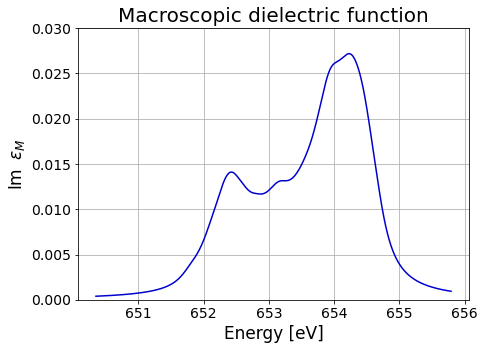

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (7, 5))
epsilon_IP = np.genfromtxt(join(cwd, 'EPSILON/EPSILON_BSE-IP_SCR-full_OC11.OUT'))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Energy [eV]', fontsize = 17)
plt.ylabel(r"$\mathrm{Im}\;\; \varepsilon_M$", fontsize = 17)
plt.title('Macroscopic dielectric function', fontsize = 20)
plt.ylim(0.000, 0.030)
plt.grid()
plt.plot(epsilon_IP[:, 0], epsilon_IP[:, 2], color = 'mediumblue')
plt.show()

Again, we parse the output files and save the results obtained for the dielectric function in the dictionary **epsilon_results** and the results obtained for the loss function in the dictionary **loss_results**.

In [12]:
epsilon_results: dict = parser_chooser(f'{cwd}/EPSILON/EPSILON_BSE-IP_SCR-full_OC11.OUT')   
loss_results: dict = parser_chooser(f'{cwd}/LOSS/LOSS_BSE-IP_SCR-full_OC11.OUT')

We can further check that the obtained results are correct by comparing them with the reference calculations. To do so within the notebook, execute the following cell :

In [13]:
from assertions_xray_emission_spectra import test_dielectric, test_loss

# Test results of dielectric function calculations
test_dielectric(epsilon_results, reference = 'reference_xray_emission_spectra/EPSILON_BSE-IP_SCR-full_OC11.OUT')

# Test results of loss function calculations
test_loss(loss_results, reference = 'reference_xray_emission_spectra/LOSS_BSE-IP_SCR-full_OC11.OUT')